In [1]:
!pip uninstall cvxopt -y
!pip install cvxopt --no-cache-dir --force-reinstall

Found existing installation: cvxopt 1.3.2
Uninstalling cvxopt-1.3.2:
  Successfully uninstalled cvxopt-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 64.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load dataset
df = pd.read_csv('/content/Student_Mental_Stress_and_Coping_Mechanisms.csv')

# view dataset

print(df.head())

    Student ID  Age  Gender  Academic Performance (GPA)  Study Hours Per Week  \
0  802-17-3671   22  Female                           2                     9   
1  871-12-8572   25  Female                           0                    28   
2  495-13-2672   24  Female                           0                    45   
3  365-77-2496   20    Male                           2                     8   
4  664-76-5622   28    Male                           0                    14   

   Social Media Usage (Hours per day)  Sleep Duration (Hours per night)  \
0                                   2                                12   
1                                   0                                 6   
2                                   3                                12   
3                                   7                                 7   
4                                   6                                 8   

   Physical Exercise (Hours per week)  Family Support    Finan

In [3]:
# Print statistics summary
print("\nSummary Statistics:")
print(df.describe())

# Check column data types
print("\nData Types:")
print(df.dtypes)


Summary Statistics:
              Age  Academic Performance (GPA)  Study Hours Per Week  \
count  689.000000                  689.000000            689.000000   
mean    23.940493                    1.981132             29.236575   
std      3.816382                    1.415628             18.082837   
min     18.000000                    0.000000              0.000000   
25%     21.000000                    1.000000             13.000000   
50%     24.000000                    2.000000             29.000000   
75%     27.000000                    3.000000             45.000000   
max     30.000000                    4.000000             60.000000   

       Social Media Usage (Hours per day)  Sleep Duration (Hours per night)  \
count                          689.000000                        689.000000   
mean                             4.240929                          8.095791   
std                              2.565425                          2.579458   
min                    


Correlation Matrix:
                                         Age  Academic Performance (GPA)  \
Age                                 1.000000                   -0.010970   
Academic Performance (GPA)         -0.010970                    1.000000   
Study Hours Per Week                0.039632                    0.007329   
Social Media Usage (Hours per day)  0.000130                    0.063288   
Sleep Duration (Hours per night)    0.043841                   -0.000698   
Physical Exercise (Hours per week) -0.041343                    0.026483   
Family Support                     -0.020824                    0.001518   
Financial Stress                   -0.003861                    0.043328   
Peer Pressure                       0.059845                    0.011541   
Relationship Stress                 0.001740                    0.009309   
Mental Stress Level                -0.043140                   -0.038021   
Diet Quality                       -0.025475                   -0.0

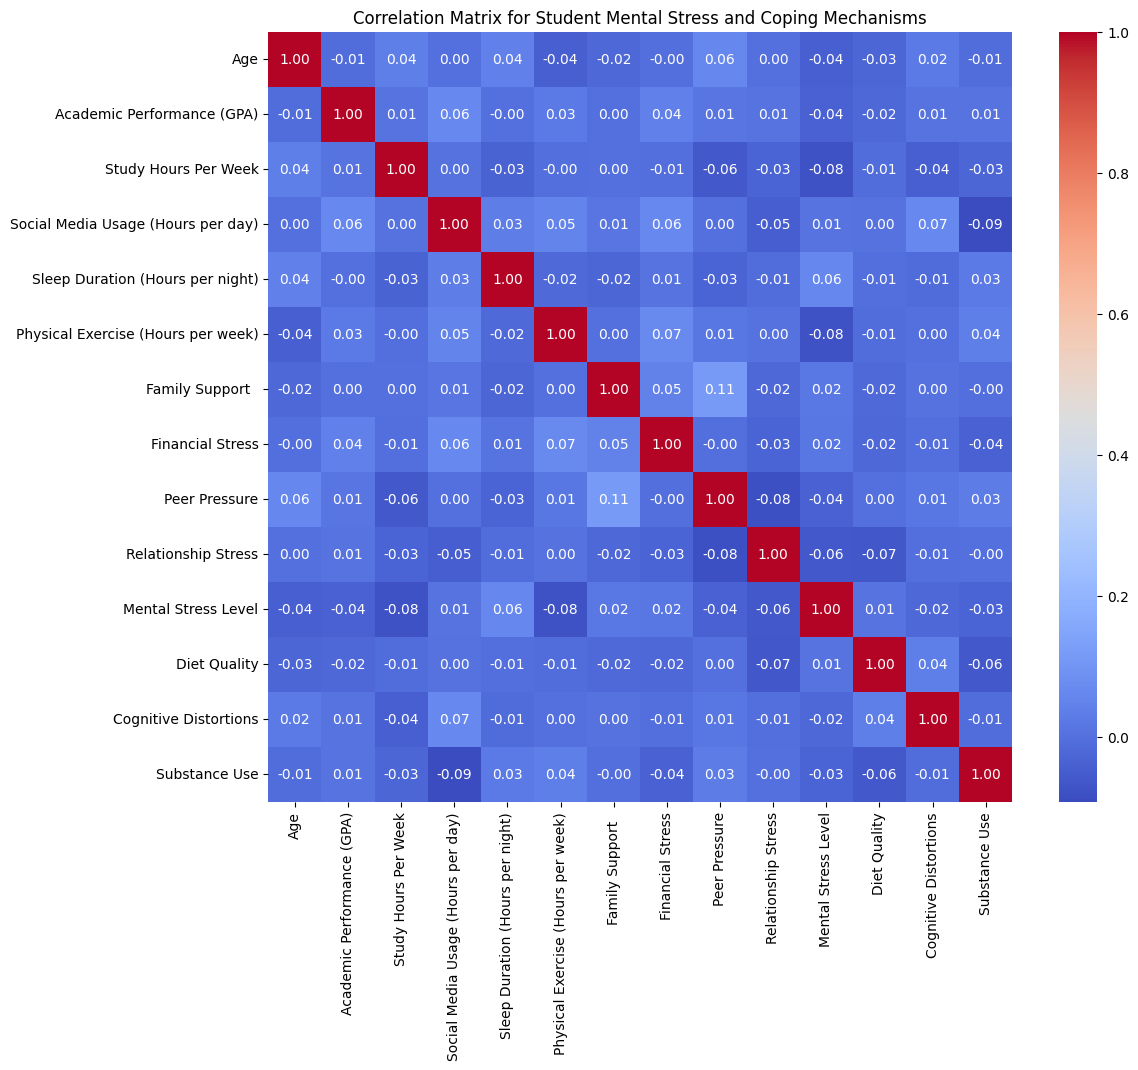

In [4]:
# correlation analysis
numeric_columns = [
    'Age',
    'Academic Performance (GPA)',
    'Study Hours Per Week',
    'Social Media Usage (Hours per day)',
    'Sleep Duration (Hours per night)',
    'Physical Exercise (Hours per week)',
    'Family Support  ',
    'Financial Stress',
    'Peer Pressure',
    'Relationship Stress',
    'Mental Stress Level',
    'Diet Quality',
    'Cognitive Distortions',
    'Substance Use'
]


# Calculate the correlation matrix for above variables
corr_matrix = df[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Student Mental Stress and Coping Mechanisms')
plt.show()


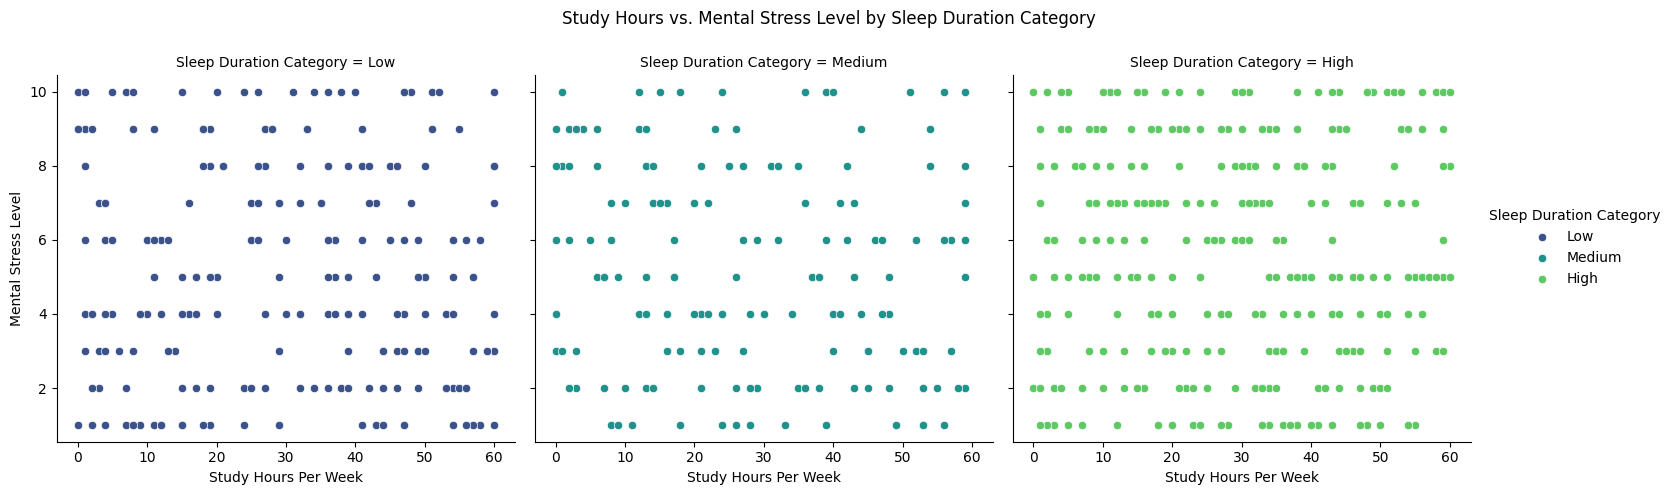

In [5]:
# categorize sleep duration into groups
df['Sleep Duration Category'] = pd.cut(df['Sleep Duration (Hours per night)'],
                                       bins=[0, 6, 8, float('inf')],
                                       labels=['Low', 'Medium', 'High'])

# Create separate scatter plots for each sleep duration category
g = sns.FacetGrid(df, col='Sleep Duration Category', hue='Sleep Duration Category',
                   palette='viridis', height=5)
g.map(sns.scatterplot, 'Study Hours Per Week', 'Mental Stress Level')
g.add_legend()
g.fig.suptitle('Study Hours vs. Mental Stress Level by Sleep Duration Category')
plt.subplots_adjust(top=0.85)  # Adjust title position
plt.show()

In [6]:

# Study Hours Per Week as the predictor and Mental Stress Level as the target.
X = df[['Study Hours Per Week']]
y = df['Mental Stress Level']

# Add a constant to the predictor for the intercept
X = sm.add_constant(X)

# Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Mental Stress Level   R-squared:                       0.006
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     3.929
Date:                 Thu, 27 Mar 2025   Prob (F-statistic):             0.0479
Time:                         15:00:45   Log-Likelihood:                -1710.5
No. Observations:                  689   AIC:                             3425.
Df Residuals:                      687   BIC:                             3434.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 